<a href="https://colab.research.google.com/github/duanefonseca/CricketML/blob/main/ajuste_funcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficientes do modelo:
[ 1.60172249 12.68902211]
 
1.602 x + 12.69
Média dos valores de x: 6.71
Média dos valores de y: 23.43
Coeficiente de determinação, R²:  0.21
Soma do quadrado dos resíduos (SQR):  362.96
Graus de liberdade (GL): 26
Log-verossimilhança: -75.60
AIC: 155.20
Teste F:  6.73
Significância do ajuste, p:  0.02
Ajuste do modelo é significativo


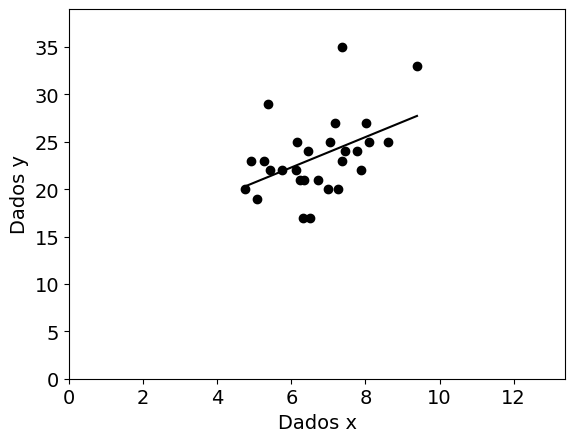

<Figure size 500x500 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f as f_dist
import math

import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']

# Carregar arquivo CSV com dados_x and dados_y - dados_x na coluna A; dados_y na coluna B
df = pd.read_csv('/content/drive/MyDrive/arquivos_dados_colab/ajuste_funcao/Dados.csv')
dados_x = df.iloc[:, 0].values  # Data from column A
dados_y = df.iloc[:, 1].values  # Data from column B

# DEFINIR O GRAU DO POLINOMIO (0, Y=A; 1, Y=BX+A; 2, Y=CX2+BX+A; ETC...)
grau = 1

# Fit the polynomial to the data
Zz = np.polyfit(dados_x, dados_y, grau)
p = np.poly1d(Zz)


# Display the coefficients and the equation of the polynomial
print("Coeficientes do modelo:")
print(Zz)

print(p)

# Print the averages of dados_x and dados_y
print(f"Média dos valores de x: {np.mean(dados_x):.2f}")
print(f"Média dos valores de y: {np.mean(dados_y):.2f}")

# Calculate the coefficient of determination R²
y_pred = p(dados_x)
SSR = np.sum((y_pred - dados_y)**2)  # Sum of the squares of the residuals
SST = np.sum((dados_y - np.mean(dados_y))**2)  # Total sum of squares
R2 = 1 - (SSR/SST)
print(f"Coeficiente de determinação, R²: {R2: .2f}")

# Print the sum of the squares of the residuals and the degrees of freedom of the model
print(f"Soma do quadrado dos resíduos (SQR): {SSR: .2f}")

# Calculate the degrees of freedom
DF = len(dados_y) - (grau + 1)
print(f"Graus de liberdade (GL): {DF}")

# Calculate the log-likelihood
n = len(dados_y)
log_likelihood = -n/2 * math.log(2*math.pi) - n/2 * math.log(SSR/n) - n/2
print(f"Log-verossimilhança: {log_likelihood:.2f}")

# Calculate the AIC
k = grau + 1  # Number of parameters
AIC = 2*k - 2*log_likelihood
print(f"AIC: {AIC:.2f}")

# Perform the F test
n = len(dados_y)  # Number of observations
k = grau + 1  # Number of parameters
F_stat = (R2 / (k - 1)) / ((1 - R2) / (n - k))
p_value = 1 - f_dist.cdf(F_stat, k - 1, n - k)
print(f"Teste F: {F_stat: .2f}")
print(f"Significância do ajuste, p: {p_value: .2f}")

# Check the significance of the fit
if p_value < 0.05:
    print("Ajuste do modelo é significativo")

# Plot the data and the fitted polynomial
plt.scatter(dados_x, dados_y, color='black')
sns.lineplot(x=dados_x, y=p(dados_x), color='k')


# FORMATAR O TAMANHO DA FONTE DA LEGENDA DO EIXO e TITULO DO EIXO
fontsize_axes = 14
plt.xlabel('Dados x', fontsize=fontsize_axes)
plt.ylabel('Dados y', fontsize=fontsize_axes)

# FORMATAR TAMANHO DA FONTE DOS NUMEROS DOS EIXOS
fontsize_ticks = 14
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)

# FORMATAR CENTRALIZACAO DOS DADOS DO GRAFICO
plt.xlim(0, max(dados_x) + 4)
plt.ylim(0, max(dados_y) + 4)

# FORMATAR TAMANHO DO GRAFICO
largura_grafico = 5  # Width of the graph
altura_grafico = 5    # Height of the graph

# Set the size of the graph
plt.figure(figsize=(largura_grafico, altura_grafico))

# Show the graph
plt.show()



Coeficientes do modelo:
[2.45974694 0.25060155]
Média dos valores de x: 5.00
Média dos valores de y: 9.94
Coeficiente de determinação, R²: 0.68
Soma do quadrado dos resíduos (SQR): 2073.51
Graus de liberdade (GL): 48
Log-verossimilhança: -164.07
AIC: 332.14
Teste F: 100.71
Significância do ajuste, p: 0.00
Ajuste do modelo é significativo


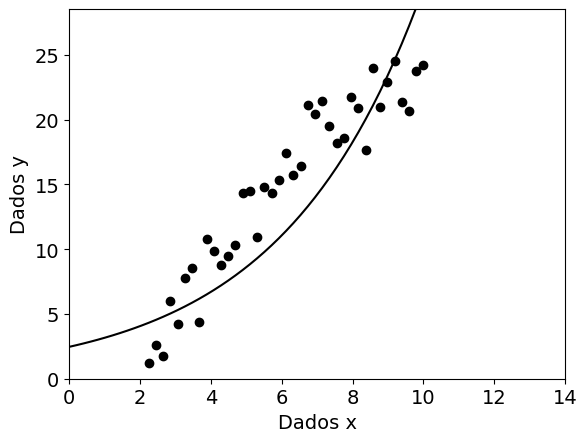

<Figure size 500x500 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import math
from scipy.stats import f as f_dist

# Carregar arquivo CSV com dados_x and dados_y - dados_x na coluna A; dados_y na coluna B
df = pd.read_csv('/content/drive/MyDrive/arquivos_dados_colab/ajuste_funcao/Dados.csv')
dados_x = df.iloc[:, 0].values  # Data from column A
dados_y = df.iloc[:, 1].values  # Data from column B

# Sample data (Replace this with your data loading mechanism)
dados_x = np.linspace(0, 10, 50)
dados_y = 30 * (1 - np.exp(-0.2 * (dados_x - 2))) + np.random.normal(0, 2, len(dados_x))

# User's choice of model
opcao = 3  # Change this to select model

# Depending on the choice, fit a different model
if opcao == 1:  # Linear (constant)
    p = lambda x, a: a * np.ones_like(x)
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 2:  # Linear (equation of the line)
    p = lambda x, b, a: b * x + a
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 3:  # Exponential
    p = lambda x, a, b: a * np.exp(b * x)
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 4:  # Power
    p = lambda x, a, b: a * x**b
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 5:  # Sigmoid
    p = lambda x, a, b: a / (1 + np.exp(-b * x))
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 6:  # Negative Exponential
    p = lambda x, a, b: a * np.exp(-b * x)
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 7:  # Gompertz
    p = lambda x, a, b: a * np.exp(-np.exp(-b * x))
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 8:  # von Bertalanffy growth model
    initial_guess = [max(dados_y), 0.1, min(dados_x)]
    p = lambda x, L_inf, K, t0: L_inf * (1 - np.exp(-K * (x - t0)))
    params, _ = curve_fit(p, dados_x, dados_y, p0=initial_guess)
else:
    raise ValueError("Invalid option")

# Calculations and printing
print("Coeficientes do modelo:")
print(params)

# Print the averages of dados_x and dados_y
print(f"Média dos valores de x: {np.mean(dados_x):.2f}")
print(f"Média dos valores de y: {np.mean(dados_y):.2f}")

SSR = np.sum((p(dados_x, *params) - dados_y)**2)
SST = np.sum((dados_y - np.mean(dados_y))**2)
R2 = 1 - (SSR/SST)
print(f"Coeficiente de determinação, R²: {R2:.2f}")

print(f"Soma do quadrado dos resíduos (SQR): {SSR:.2f}")

k = len(params)
DF = len(dados_y) - k
print(f"Graus de liberdade (GL): {DF}")

n = len(dados_y)
log_likelihood = -n/2 * math.log(2*math.pi) - n/2 * math.log(SSR/n) - n/2
print(f"Log-verossimilhança: {log_likelihood:.2f}")

AIC = 2*k - 2*log_likelihood
print(f"AIC: {AIC:.2f}")

F_stat = (R2 / (k - 1)) / ((1 - R2) / (n - k))
p_value = 1 - f_dist.cdf(F_stat, k - 1, n - k)
print(f"Teste F: {F_stat:.2f}")
print(f"Significância do ajuste, p: {p_value:.2f}")

if p_value < 0.05:
    print("Ajuste do modelo é significativo")

# Plotting
plt.scatter(dados_x, dados_y, color='black')
sns.lineplot(x=dados_x, y=p(dados_x, *params), color='k')
fontsize_axes = 14
plt.xlabel('Dados x', fontsize=fontsize_axes)
plt.ylabel('Dados y', fontsize=fontsize_axes)
fontsize_ticks = 14
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.xlim(0, max(dados_x) + 4)
plt.ylim(0, max(dados_y) + 4)
largura_grafico = 5
altura_grafico = 5
plt.figure(figsize=(largura_grafico, altura_grafico))
plt.show()


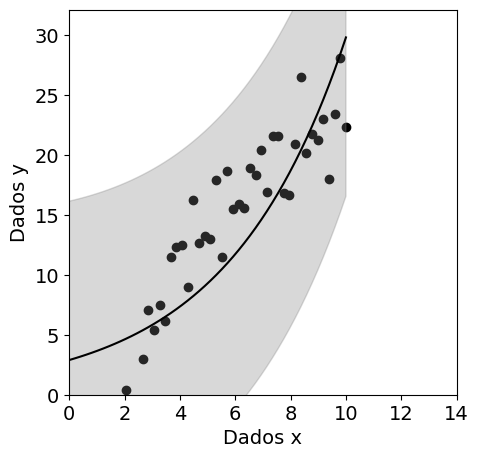

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import t

# Sample data (Replace this with your data loading mechanism)
dados_x = np.linspace(0, 10, 50)
dados_y = 30 * (1 - np.exp(-0.2 * (dados_x - 2))) + np.random.normal(0, 2, len(dados_x))

# Function to compute the 95% prediction interval
def prediction_interval(x, y_obs, y_pred, params, p):
    n = len(y_obs)
    residuals = y_obs - y_pred
    std_resid = np.std(residuals, ddof=2)  # ddof=2 to account for 2 parameters in models
    x_mean = np.mean(x)
    SE = std_resid * np.sqrt(1 + 1/n + (x - x_mean)**2/np.sum((x - x_mean)**2))
    t_value = t.ppf(0.975, df=n-2)
    delta = t_value * SE
    lower = y_pred - delta
    upper = y_pred + delta
    return lower, upper

# User's choice of model
opcao = 3  # Change this to select model

# Depending on the choice, fit a different model
if opcao == 1:  # Linear (constant)
    p = lambda x, a: a * np.ones_like(x)
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 2:  # Linear (equation of the line)
    p = lambda x, b, a: b * x + a
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 3:  # Exponential
    p = lambda x, a, b: a * np.exp(b * x)
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 4:  # Power
    p = lambda x, a, b: a * x**b
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 5:  # Sigmoid
    p = lambda x, a, b: a / (1 + np.exp(-b * x))
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 6:  # Negative Exponential
    p = lambda x, a, b: a * np.exp(-b * x)
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 7:  # Gompertz
    p = lambda x, a, b: a * np.exp(-np.exp(-b * x))
    params, _ = curve_fit(p, dados_x, dados_y)
elif opcao == 8:  # von Bertalanffy growth model
    initial_guess = [max(dados_y), 0.1, min(dados_x)]
    p = lambda x, L_inf, K, t0: L_inf * (1 - np.exp(-K * (x - t0)))
    params, _ = curve_fit(p, dados_x, dados_y, p0=initial_guess)
else:
    raise ValueError("Invalid option")

# Compute prediction interval
y_pred = p(dados_x, *params)
lower, upper = prediction_interval(dados_x, dados_y, y_pred, params, p)

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(dados_x, dados_y, color='black')
plt.plot(dados_x, y_pred, color='k')
plt.fill_between(dados_x, lower, upper, color='gray', alpha=0.3)
plt.xlabel('Dados x', fontsize=14)
plt.ylabel('Dados y', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, max(dados_x) + 4)
plt.ylim(0, max(dados_y) + 4)
plt.show()
